# Hack Zurich - Fringer

In [2]:
from __future__ import division, print_function

import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from scipy.spatial.distance import pdist, squareform
from sklearn.manifold import MDS, Isomap, TSNE
from sklearn.decomposition import PCA

from fringiness import fringiness

Create random data.

In [3]:
def random_data(n, m, sparsity=0.8,mean=2,method='poisson'):
    """
    Parameters
    ----------
    n : int
        number of samples
    m : int
        number of features
    sparsity : float between 0 and 1
        sets the ratio of zero values in the resulting matrix.
    """
    if method == 'poisson':
        r = np.random.poisson(mean, (n, m))
    else:
        r = np.random.randn(n*m).reshape((n,m)) + mean
    p = np.random.rand(n*m).reshape((n,m))
    r[p<sparsity] = 0
    return r

In [4]:
data = np.vstack((
    random_data(200, 100, mean=.5, sparsity=.8, method='poisson'), 
    random_data(200, 100, mean=10, sparsity=.8, method='normal'),
    random_data(200, 100, mean=8, sparsity=.8, method='poisson'), 
    random_data(200, 100, mean=1, sparsity=.8, method='normal')))

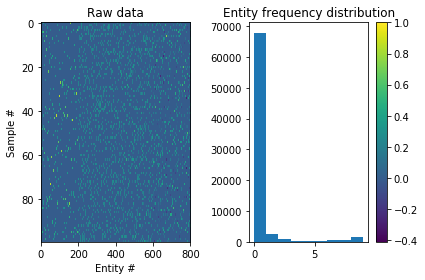

In [5]:
fig = plt.figure()

ax = fig.add_subplot(121)
ax.set_title('Raw data')
cax = ax.imshow(data.T / np.linalg.norm(data,axis=1), aspect='auto')
ax.set_ylabel('Sample #')
ax.set_xlabel('Entity #')

ax = fig.add_subplot(122)
ax.hist(data.flatten(),bins=range(10))
ax.set_title('Entity frequency distribution')

plt.colorbar(cax)
plt.tight_layout()

In [10]:
def plot(data, dist):
    t0, t1, s = fringiness(data, distance_metric=dist)
    fig = plt.figure(figsize=(8,4))

    ax = fig.add_subplot(121)
    ax.hist(s, color='black')
    ax.text(s[0], .1, "I %.2f"%s[0], color='red', size=14)
    ax.set_xlim([0,1])

    ax = fig.add_subplot(122)
    cax = ax.scatter(t0, t1, c=s, vmin=0, vmax=1)
    ax.scatter(t0[0], t1[0], c='red')
    ax.axis('off')
    plt.colorbar(cax)

    plt.tight_layout()

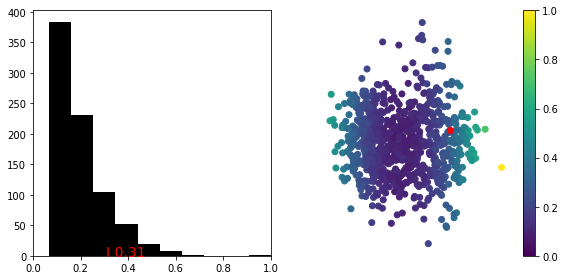

In [11]:
plot(data, 'cosine')